In [2]:
#import all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Darknet.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


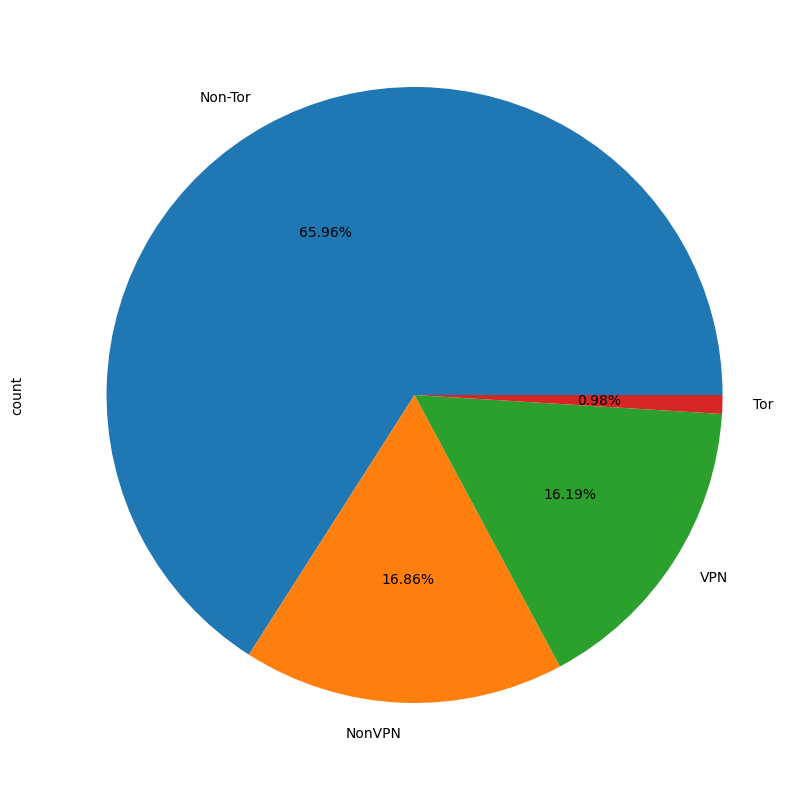

In [4]:
#check the label column for types of attacks and count them
df['Label'].value_counts()

#plot the pie chart for the types of attacks
plt.figure(figsize=(10,10))
df['Label'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()


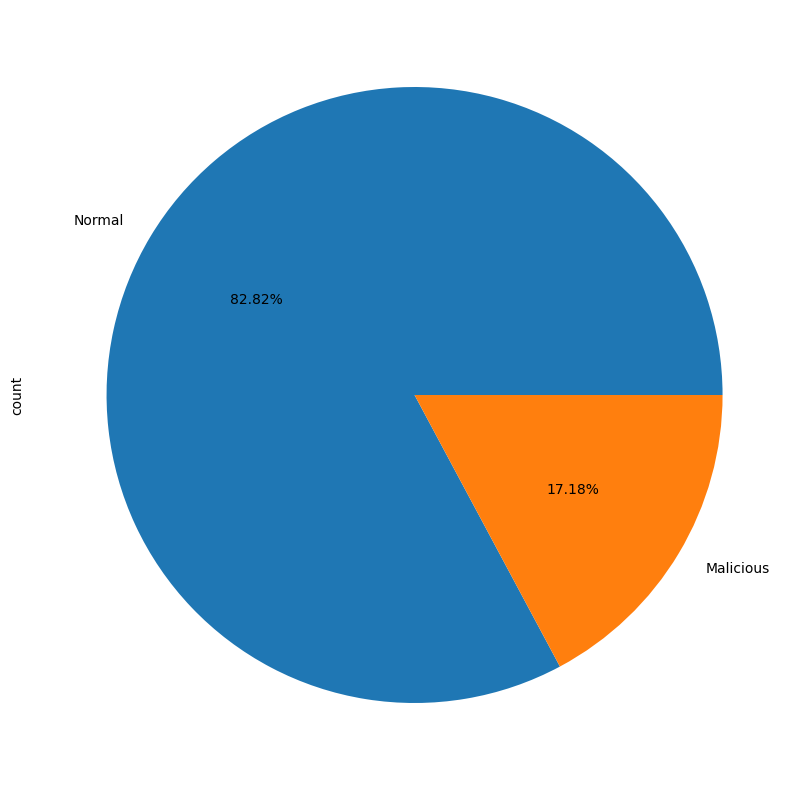

In [5]:
#plot Non-Tor and NonVPN as normal traffic and Tor and VPN as malicious traffic
df['Label'] = df['Label'].replace(['Non-Tor', 'NonVPN'], 'Normal')
df['Label'] = df['Label'].replace(['Tor', 'VPN'], 'Malicious')

#make a pie chart for the new labels and add labels with values counts not percentage 
plt.figure(figsize=(10,10))
df['Label'].value_counts().plot(kind='pie', autopct='%.2f%%', labels=['Normal', 'Malicious'], labeldistance=1.1)
#plot the pie chart for the types of attacks
plt.show()

In [6]:
#Do a value count for the new labels
df['Label'].value_counts()

Label
Normal       117219
Malicious     24311
Name: count, dtype: int64

In [7]:
#drop the second label column
df = df.drop(['Label.1'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 84 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [9]:
#create a holdout set for testing later with 10% of the data by putting 0.1 in the test_size
from sklearn.model_selection import train_test_split
main_set, hold_out_set = train_test_split(df, test_size=0.1, random_state=42)


In [37]:
#drop the label column from the main set and assign it to a new variable
main_set_labels = main_set['Label'].copy()
main_set = main_set.drop(['Label'], axis=1)

In [41]:
#perform the label encoding for main set 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
main_set_encoded = encoder.fit_transform(main_set)

ValueError: y should be a 1d array, got an array of shape (127377, 83) instead.

In [39]:
#do PCA to reduce the dimensions of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
main_set_reduced = pca.fit_transform(main_set)

#check the number of components
pca.n_components_

ValueError: could not convert string to float: '10.152.152.11-78.106.150.242-33040-58553-6'

In [35]:
#do PCA to reduce the number of features
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(numeric_features.drop('Label', axis=1))
X_test_reduced = pca.transform(numeric_features.drop('Label', axis=1))

ValueError: could not convert string to float: '10.152.152.11-78.106.150.242-33040-58553-6'

In [11]:
# Drop non-relevant columns (identifiers and protocol which is categorical)
X = main_set[numeric_features].drop(['Src Port', 'Dst Port', 'Protocol'], axis=1)


In [12]:
# Replace infinities and NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [13]:
#only select the numeric columns
numeric_cols = X.columns.values.tolist()
numeric_cols

['Flow Duration',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'CWE Flag Cou

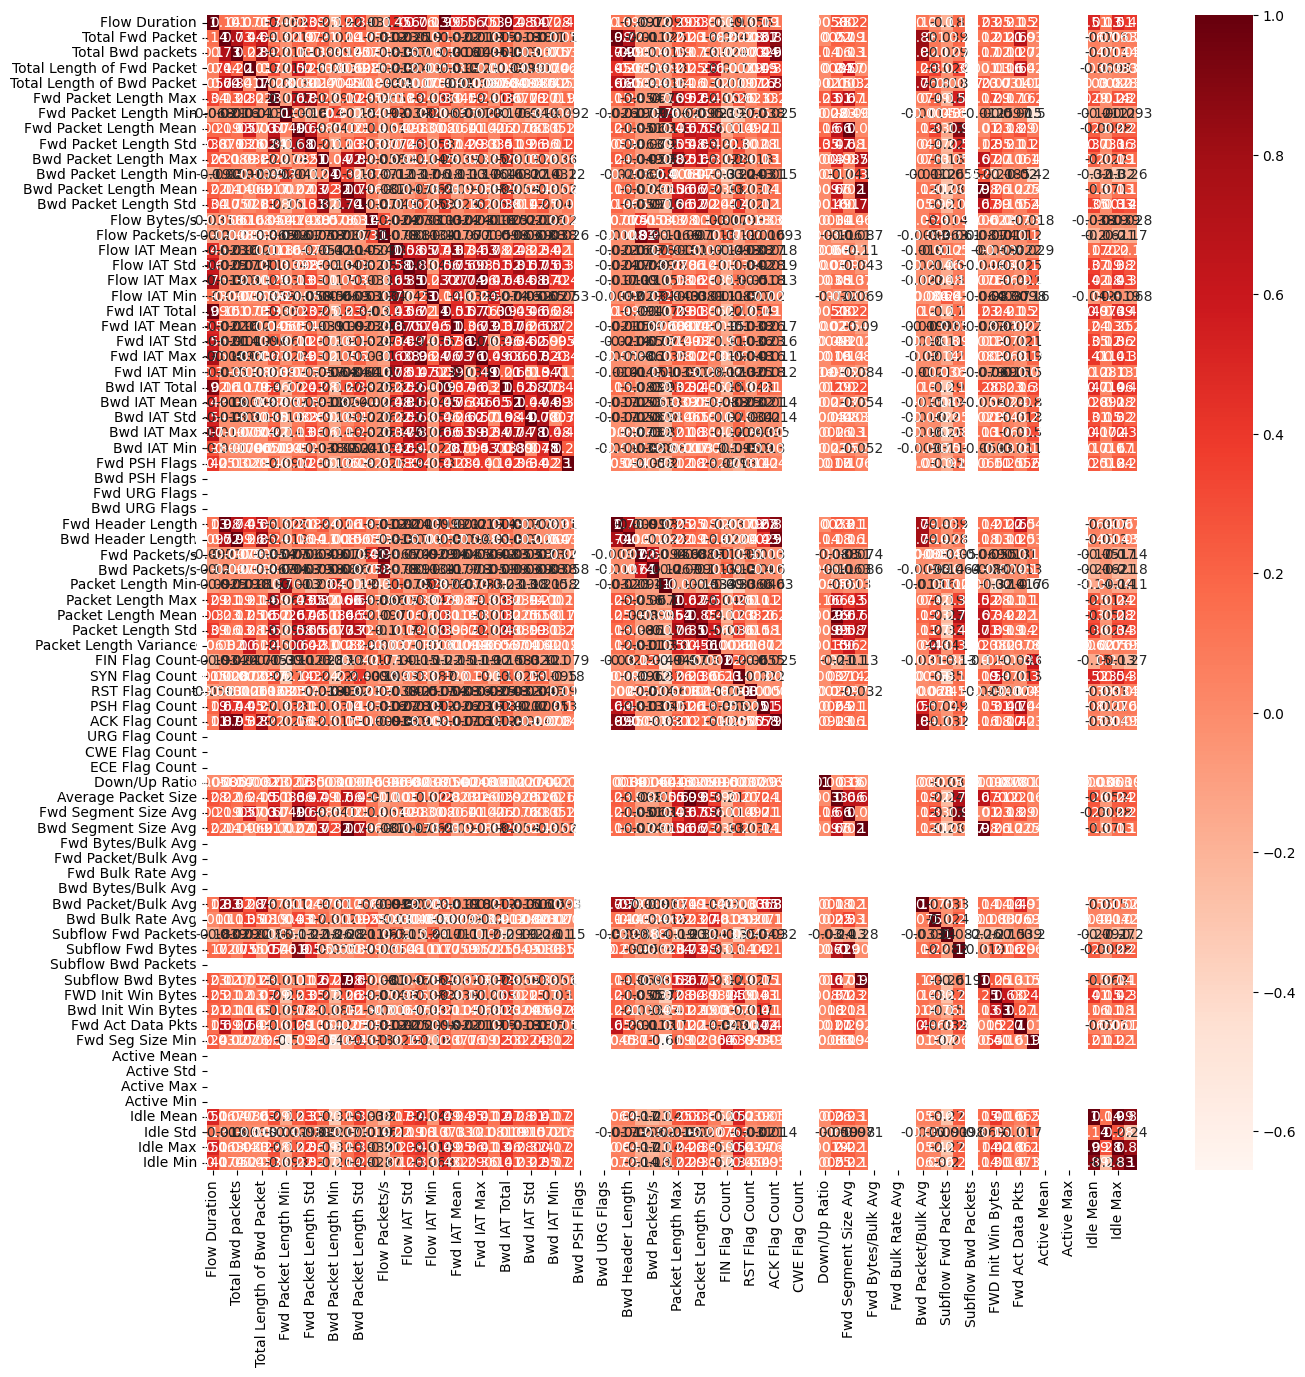

In [14]:
#get the correlation of the features
corr = X.corr()

#plot the correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
# Encode the labels to binary format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(main_set['Label'])

In [16]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6565
           1       0.99      0.99      0.99     31649

    accuracy                           0.98     38214
   macro avg       0.98      0.96      0.97     38214
weighted avg       0.98      0.98      0.98     38214

Accuracy: 0.9834092217511906


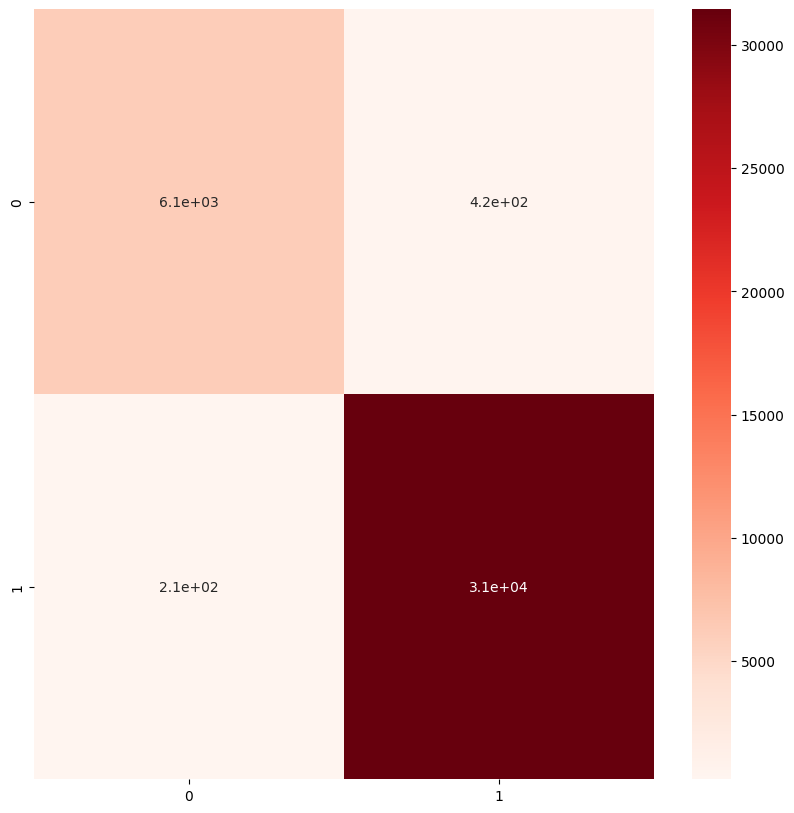

In [21]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

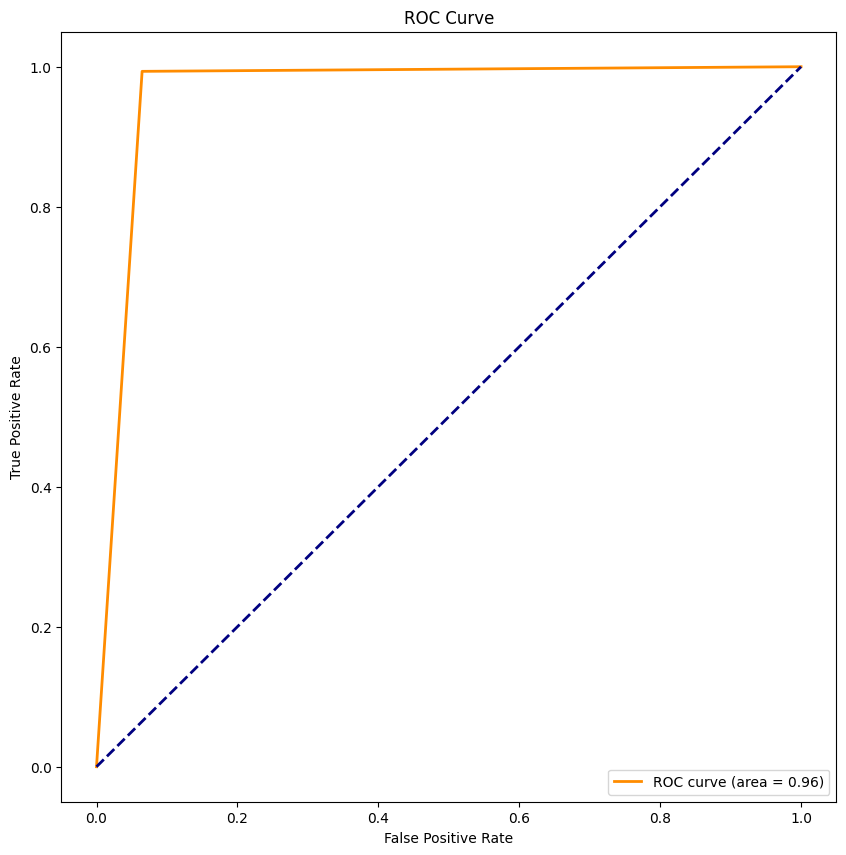

In [22]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [24]:
# Initialize the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [25]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [26]:
# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6565
           1       0.99      0.98      0.99     31649

    accuracy                           0.98     38214
   macro avg       0.95      0.97      0.96     38214
weighted avg       0.98      0.98      0.98     38214

Accuracy: 0.976710106243785


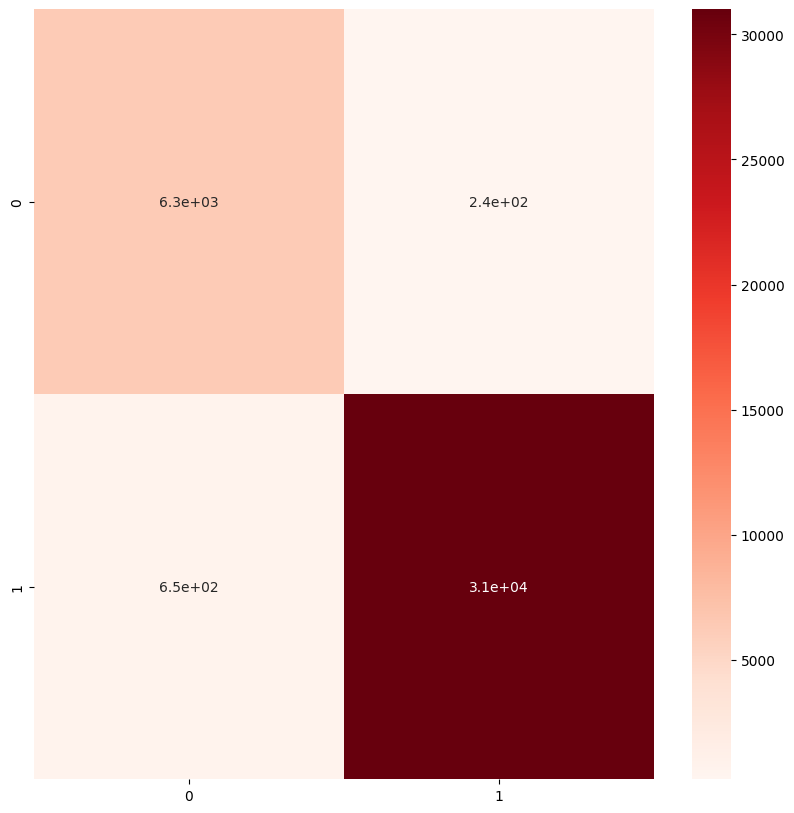

In [27]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

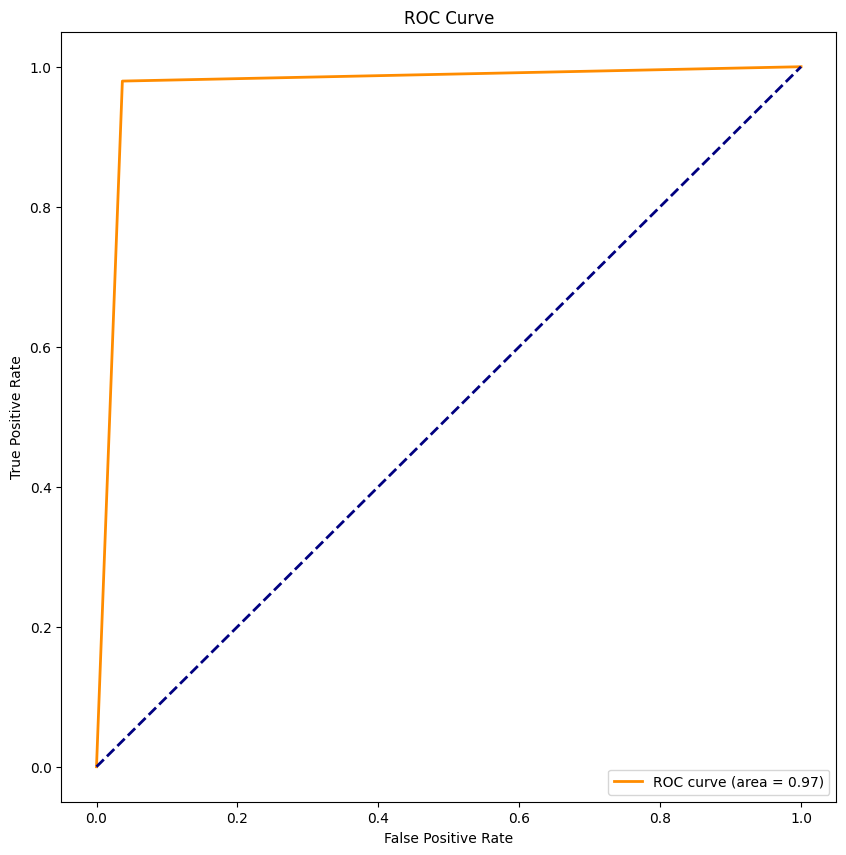

In [28]:
#plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2428
           1       0.99      0.98      0.99     11725

    accuracy                           0.98     14153
   macro avg       0.95      0.97      0.96     14153
weighted avg       0.98      0.98      0.98     14153

Accuracy: 0.9780258602416448


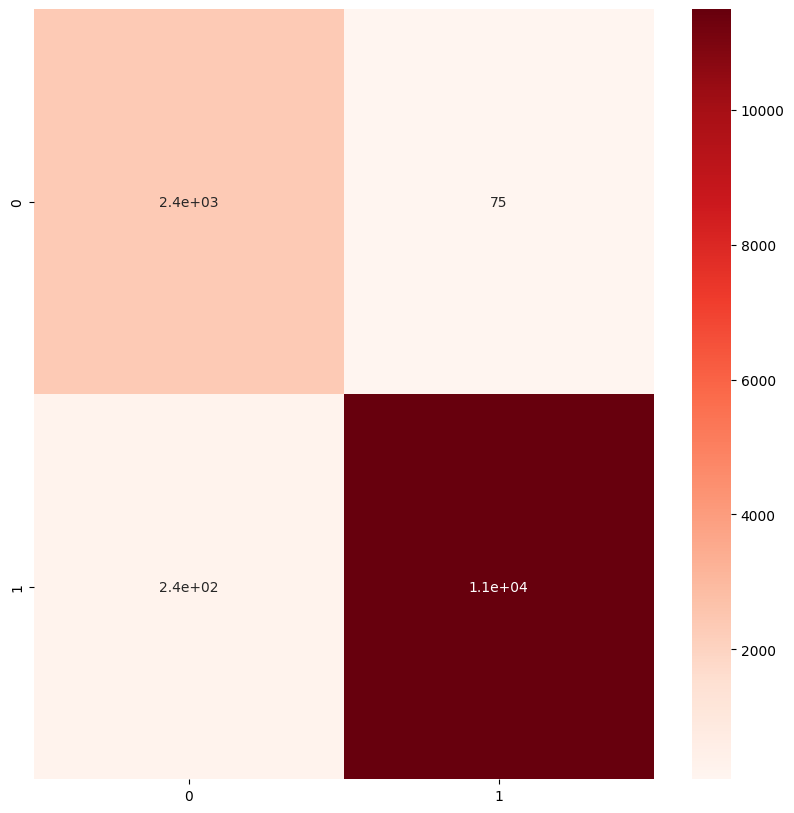

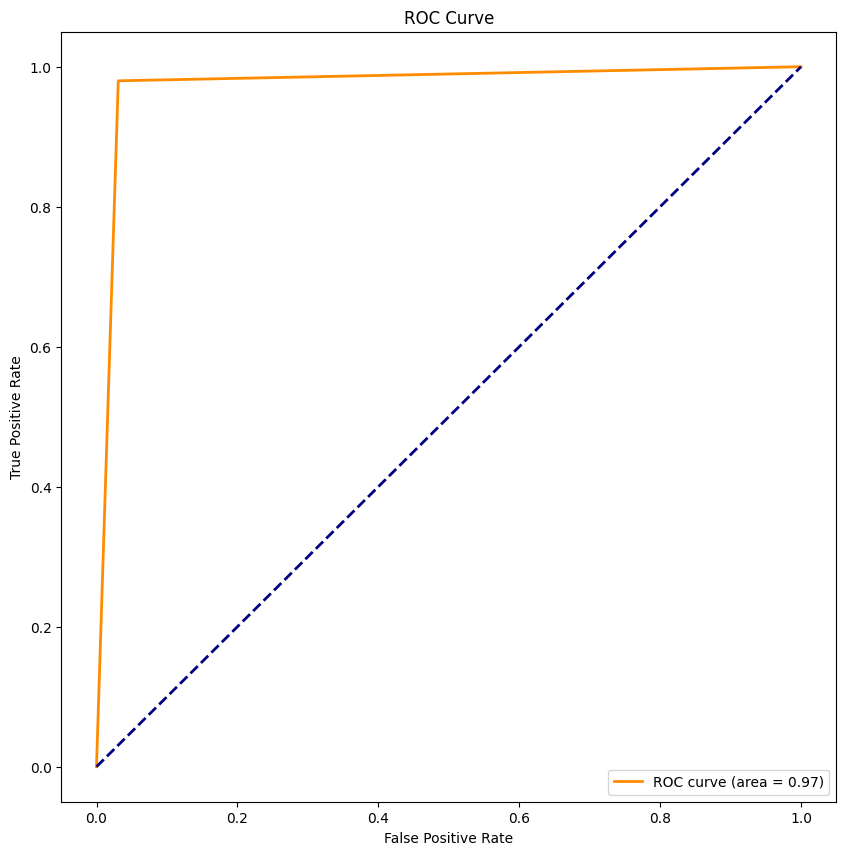

In [29]:
#use the holdout set for testing
X_holdout = hold_out_set[numeric_features].drop(['Src Port', 'Dst Port', 'Protocol'], axis=1)
X_holdout.replace([np.inf, -np.inf], np.nan, inplace=True)
X_holdout.fillna(X_holdout.mean(), inplace=True)
X_holdout_scaled = scaler.transform(X_holdout)
y_holdout = le.transform(hold_out_set['Label'])

# Predict on the holdout set
y_pred = rf_classifier.predict(X_holdout_scaled)

# Print classification report and accuracy
print(classification_report(y_holdout, y_pred))
print(f"Accuracy: {accuracy_score(y_holdout, y_pred)}")

#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_holdout, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

#plot the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_holdout, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
#save the model
import pickle
filename = 'darknet_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

#load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Predict on the holdout set
y_pred = loaded_model.predict(X_holdout_scaled)

# Print classification report and accuracy
print(classification_report(y_holdout, y_pred))
print(f"Accuracy: {accuracy_score(y_holdout, y_pred)}")


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2428
           1       0.99      0.98      0.99     11725

    accuracy                           0.98     14153
   macro avg       0.95      0.97      0.96     14153
weighted avg       0.98      0.98      0.98     14153

Accuracy: 0.9780258602416448


In [33]:
# Assuming 'hold_out_set' still contains the 'Label' column for identification
# Filter the holdout set for 'Normal' and 'Malicious' traffic
normal_traffic = hold_out_set[hold_out_set['Label'] == 'Normal']
malicious_traffic = hold_out_set[hold_out_set['Label'] == 'Malicious']

# Sample 10 rows from each type of traffic
normal_sample = normal_traffic.sample(10, random_state=42)
malicious_sample = malicious_traffic.sample(10, random_state=42)

# Concatenate the two samples
mixed_sample = pd.concat([normal_sample, malicious_sample])

# Save the mixed sample set to a csv file
mixed_sample.to_csv('holdout_set_mixed.csv', index=False)



In [34]:
# Load the mixed sample set
mixed_sample = pd.read_csv('holdout_set_mixed.csv')
mixed_sample

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,131.202.240.150-131.202.6.3-28755-53-17,131.202.240.150,28755,131.202.6.3,53,17,1/4/2015 14:57,160514,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
1,10.152.152.11-37.48.110.21-9100-51108-17,10.152.152.11,9100,37.48.110.21,51108,17,24/02/2016 11:27:24 AM,9800445,3,0,...,8,0,0,0,0,1.456330e+15,0.000000e+00,1.456330e+15,1.456330e+15,Normal
2,10.152.152.11-37.252.170.157-54539-443-6,10.152.152.11,54539,37.252.170.157,443,6,25/02/2016 08:35:10 AM,22,2,0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
3,10.152.152.11-10.152.152.10-54415-53-17,10.152.152.11,54415,10.152.152.10,53,17,25/02/2016 08:58:50 AM,513907,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
4,10.152.152.11-118.92.102.195-47894-42570-6,10.152.152.11,47894,118.92.102.195,42570,6,24/02/2016 10:43:34 AM,83209877,8,6,...,20,0,0,0,0,1.456330e+15,3.268117e+07,1.456330e+15,1.456330e+15,Normal
5,41.202.168.28-10.152.152.11-51230-34245-6,41.202.168.28,51230,10.152.152.11,34245,6,24/02/2016 10:01:07 AM,25,1,1,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
6,131.202.240.70-224.0.0.252-55453-5355-17,131.202.240.70,55453,224.0.0.252,5355,17,25/05/2015 02:10:52 PM,419681,2,0,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
7,10.152.152.11-173.194.40.121-50749-443-6,10.152.152.11,50749,173.194.40.121,443,6,24/02/2016 02:35:25 PM,1111,4,2,...,20,0,0,0,0,1.456340e+15,3.773226e+02,1.456340e+15,1.456340e+15,Normal
8,10.152.152.11-10.152.152.10-47246-53-17,10.152.152.11,47246,10.152.152.10,53,17,25/02/2016 09:06:02 AM,478054,2,2,...,8,0,0,0,0,1.456410e+15,1.045684e+05,1.456410e+15,1.456410e+15,Normal
9,131.202.240.150-131.202.244.5-48782-53-17,131.202.240.150,48782,131.202.244.5,53,17,1/4/2015 16:07,46570,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Normal
